In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [148]:
#  Loading Dataset
bookings_df = pd.read_csv('bookings.csv')
sessions_df = pd.read_csv('sessions.csv')

In [149]:
bookings_df.head(3)

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0


In [150]:
sessions_df.head(3)

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN


In [151]:
print("bookings_df : ",bookings_df.shape)
print("sessions_df : ",sessions_df.shape)

bookings_df :  (339, 13)
sessions_df :  (1497, 5)


In [152]:
bookings_df.isnull().sum()

customer_id          0
booking_id           0
from_city            0
from_country         0
to_city              0
to_country           0
booking_time         0
device_type_used     0
INR_Amount           0
service_name         0
no_of_passengers     0
days_to_departure    0
distance_km          0
dtype: int64

In [153]:
sessions_df.isnull().sum()
# WE have some NULL values

session_id                  0
search_id                   0
search_time                 0
session_starting_time       0
booking_id               1131
dtype: int64

In [154]:
 bookings_df['booking_id'].nunique()


339

In [155]:
sessions_df['booking_id'].nunique()


338

In [156]:
bookings_df['booking_id']

0       booking_82
1      booking_156
2       booking_99
3      booking_319
4      booking_222
          ...     
334    booking_238
335     booking_37
336    booking_239
337    booking_131
338    booking_336
Name: booking_id, Length: 339, dtype: object

In [157]:
sessions_df.tail()

,session_id,search_id,search_time,session_starting_time,booking_id
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN
1496,session_120,search_1180,2021-12-23T17:34:52Z,2021-12-23T17:29:33.217Z,booking_155


In [158]:
bookings_df.tail()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0
338,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11T18:46:59Z,Desktop,41117.60,GOIBIBO,1.0,20.0,6354.9


In [159]:
df = pd.merge(bookings_df, sessions_df, on='booking_id')
df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z


In [160]:
df.shape

(366, 17)

In [161]:
df.dtypes

customer_id               object
booking_id                object
from_city                 object
from_country              object
to_city                   object
to_country                object
booking_time              object
device_type_used          object
INR_Amount               float64
service_name              object
no_of_passengers         float64
days_to_departure        float64
distance_km              float64
session_id                object
search_id                 object
search_time               object
session_starting_time     object
dtype: object

In [162]:
df.isnull().sum()

customer_id              0
booking_id               0
from_city                0
from_country             0
to_city                  0
to_country               0
booking_time             0
device_type_used         0
INR_Amount               0
service_name             0
no_of_passengers         0
days_to_departure        0
distance_km              0
session_id               0
search_id                0
search_time              0
session_starting_time    0
dtype: int64

#### 1. Find the number of distinct bookings, sessions, and searches from the given datasets.

In [32]:
print(f"Number of distinct bookings : {df['booking_id'].nunique()}")
print(f"Number of distinct session : {df['session_id'].nunique()}")
print(f"Number of distinct searches : {df['search_id'].nunique()}")

Number of distinct bookings : 338
Number of distinct session : 329
Number of distinct searches : 338


#### 2. How many sessions have more than one booking

In [35]:
sbc = df.groupby('session_id')['booking_id'].nunique()

In [262]:
sbc

session_id
session_0      1
session_1      1
session_10     1
session_100    1
session_101    1
              ..
session_95     1
session_96     1
session_97     1
session_98     1
session_99     1
Name: booking_id, Length: 329, dtype: int64

In [42]:
sbc[sbc> 1] 

session_id
session_134    2
session_154    2
session_196    2
session_231    2
session_27     2
session_290    2
session_298    2
session_324    2
session_50     2
session_76     2
Name: booking_id, dtype: int64

In [37]:
result = sbc[sbc > 1].count()
result

10

In [43]:
session_booking_counts = df.groupby('session_id')['booking_id'].nunique()

sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1].count()

print(f"Number of sessions with more than one booking: {sessions_with_multiple_bookings}")


Number of sessions with more than one booking: 10


#### 3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week.

In [44]:
df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z


In [45]:
df.dtypes

customer_id               object
booking_id                object
from_city                 object
from_country              object
to_city                   object
to_country                object
booking_time              object
device_type_used          object
INR_Amount               float64
service_name              object
no_of_passengers         float64
days_to_departure        float64
distance_km              float64
session_id                object
search_id                 object
search_time               object
session_starting_time     object
dtype: object

In [164]:
# IN booking time we have date and Time

# df['booking_time'] = pd.to_datetime(df['booking_time'], format= '%Y/%m/%dT%H:%M:%SZ')

df['booking_time'] = pd.to_datetime(df['booking_time'], format='%Y-%m-%dT%H:%M:%SZ')


In [165]:
df.dtypes

customer_id                      object
booking_id                       object
from_city                        object
from_country                     object
to_city                          object
to_country                       object
booking_time             datetime64[ns]
device_type_used                 object
INR_Amount                      float64
service_name                     object
no_of_passengers                float64
days_to_departure               float64
distance_km                     float64
session_id                       object
search_id                        object
search_time                      object
session_starting_time            object
dtype: object

In [51]:
df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z


In [167]:
df['day_of_week'] = df['booking_time'].dt.day_name()

In [168]:
df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,Tuesday


In [263]:
bookings_by_day = df['day_of_week'].value_counts()
print(bookings_by_day)

day_of_week
Thursday     70
Tuesday      62
Friday       57
Monday       54
Saturday     49
Sunday       38
Wednesday    36
Name: count, dtype: int64


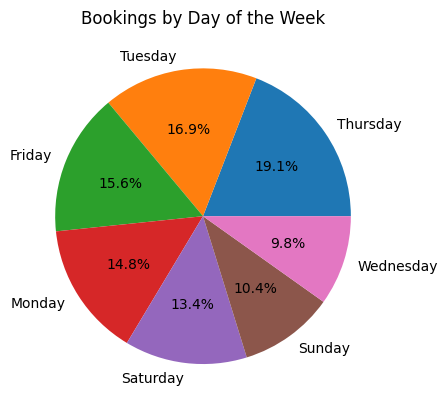

In [61]:
bookings_by_day = df['day_of_week'].value_counts()
# print(bookings_by_day)

# Ploting pie chart
bookings_by_day.plot.pie(autopct='%1.1f%%')
plt.title('Bookings by Day of the Week')
plt.ylabel('')
plt.show()

#### 4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR

In [62]:
df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,Tuesday


In [64]:
df.groupby('service_name')['booking_id'].count()

service_name
GOIBIBO    201
MMT         53
YATRA      112
Name: booking_id, dtype: int64

In [69]:
service_summary = df.groupby('service_name',as_index = False).agg(
    total_bookings=pd.NamedAgg(column='booking_id', aggfunc='nunique'),
    total_gbv_inr=pd.NamedAgg(column='INR_Amount', aggfunc='sum')
)

print(service_summary)

  service_name  total_bookings  total_gbv_inr
0      GOIBIBO             185     6524856.77
1          MMT              48      688445.65
2        YATRA             105     3742584.21


In [82]:
# plt.bar(service_summary['service_name'],service_summary['total_gbv_inr'])
# plt.title("Bar Plot")
# plt.xlabel("service_name  ")
# plt.ylabel("INR")
# plt.grid(True)
# plt.show()

#### 5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [105]:
df.tail()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week
361,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,session_251,search_978,2020-03-21T06:38:49.374Z,2020-03-21T06:39:51.268Z,Saturday
362,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,session_78,search_375,2020-01-31T20:27:38.420Z,2020-01-31T19:48:13.166Z,Friday
363,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11 14:31:28,Desktop,55152.80,YATRA,2.0,22.0,6760.0,session_118,search_30,2018-10-11T14:05:20.610Z,2018-10-11T12:38:29.186Z,Thursday
364,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11 18:46:59,Desktop,41117.60,GOIBIBO,1.0,20.0,6354.9,session_51,search_890,2022-07-11T18:42:18Z,2022-07-11T18:24:53.318Z,Monday
365,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11 18:46:59,Desktop,41117.60,GOIBIBO,1.0,20.0,6354.9,session_51,search_890,2022-07-11T18:42:18Z,2022-07-11T18:24:53.318Z,Monday


In [85]:
customer_booking_counts = df.groupby('customer_id')['booking_id'].nunique()

In [133]:
customer_booking_counts

customer_id
customer_0      1
customer_1      1
customer_10     1
customer_100    1
customer_101    1
               ..
customer_95     1
customer_96     1
customer_97     4
customer_98     1
customer_99     1
Name: booking_id, Length: 305, dtype: int64

In [104]:
customer_booking_counts.index

Index(['customer_0', 'customer_1', 'customer_10', 'customer_100',
       'customer_101', 'customer_102', 'customer_103', 'customer_104',
       'customer_105', 'customer_106',
       ...
       'customer_90', 'customer_91', 'customer_92', 'customer_93',
       'customer_94', 'customer_95', 'customer_96', 'customer_97',
       'customer_98', 'customer_99'],
      dtype='object', name='customer_id', length=305)

In [98]:
customer_booking_counts.count()

305

In [90]:
customers_with_multiple_bookings = customer_booking_counts[customer_booking_counts > 1].index

In [91]:
customers_with_multiple_bookings

Index(['customer_120', 'customer_137', 'customer_144', 'customer_155',
       'customer_160', 'customer_176', 'customer_179', 'customer_200',
       'customer_217', 'customer_230', 'customer_235', 'customer_237',
       'customer_245', 'customer_246', 'customer_247', 'customer_255',
       'customer_265', 'customer_28', 'customer_282', 'customer_297',
       'customer_33', 'customer_44', 'customer_49', 'customer_67',
       'customer_93', 'customer_97'],
      dtype='object', name='customer_id')

In [92]:
filtered_df = df[df['customer_id'].isin(customers_with_multiple_bookings)]

In [115]:
# For understanding how it is taking data  
r=df['customer_id'].isin(['customer_137','customer_49'])
r

0      False
1      False
2      False
3      False
4      False
       ...  
361    False
362    False
363    False
364    False
365    False
Name: customer_id, Length: 366, dtype: bool

In [128]:
# filtered_numbers = [num for index, num in enumerate(r) if num ==True]

for index, element in enumerate(r):
# for i in r:
    if element == True:
        print(f"printing index: {index}, printing value what we have here:   {element}")
    else:
        pass

printing index: 43, printing value what we have here:   True
printing index: 49, printing value what we have here:   True
printing index: 177, printing value what we have here:   True
printing index: 279, printing value what we have here:   True


In [131]:
filtered_df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week
6,customer_28,booking_129,Kolkata,India,Gurgaon,India,2022-02-16 15:50:27,Desktop,13442.40,GOIBIBO,1.0,13.0,1310.7,session_292,search_1035,2022-02-16T15:43:29Z,2022-02-16T15:43:08.734Z,Wednesday
7,customer_217,booking_18,Bhubaneswar,India,Durlaga,India,2021-09-10 19:09:12,Desktop,4352.00,GOIBIBO,2.0,47.0,260.5,session_27,search_435,2021-09-10T19:04:29Z,2021-09-10T19:03:05.124Z,Friday
13,customer_282,booking_212,Indore,India,Mumbai,India,2021-10-16 07:56:59,IOS,4725.60,GOIBIBO,1.0,0.0,506.2,session_65,search_234,2021-10-16T07:51:29Z,2021-10-16T07:50:51Z,Saturday
16,customer_179,booking_218,Gurgaon,India,Port Blair,India,2020-01-12 17:34:59,Desktop,17804.80,MMT,2.0,35.0,2486.8,session_24,search_943,2020-01-12T17:11:57.401Z,2020-01-12T17:11:10.379Z,Sunday
25,customer_179,booking_157,Mumbai,India,Jaipur,India,2020-01-23 13:58:39,Desktop,6953.60,GOIBIBO,1.0,15.0,921.8,session_7,search_922,2020-01-23T13:56:48.659Z,2020-01-23T13:56:46.839Z,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,customer_247,booking_48,Rāja Sānsi,India,Gurgaon,India,2021-11-09 04:04:49,Android,5707.20,GOIBIBO,1.0,23.0,414.6,session_171,search_896,2021-11-09T03:59:37Z,2021-11-09T03:59:18Z,Tuesday
354,customer_33,booking_187,Gurgaon,India,Berlin,Germany,2019-11-07 14:50:11,IOS,20759.20,GOIBIBO,1.0,2.0,6008.3,session_136,search_350,2019-11-07T14:34:09.154Z,2019-11-07T14:33:46Z,Thursday
358,customer_67,booking_328,Devanhalli,India,Gurgaon,India,2020-10-15 14:43:32,Desktop,5635.73,MMT,1.0,2.0,1694.7,session_134,search_564,2020-10-15T14:42:16Z,2020-10-15T14:39:47.196Z,Thursday
359,customer_67,booking_328,Devanhalli,India,Gurgaon,India,2020-10-15 14:43:32,Desktop,5635.73,MMT,1.0,2.0,1694.7,session_134,search_564,2020-10-15T14:42:16Z,2020-10-15T14:39:47.196Z,Thursday


In [136]:
#  .size()
# # When applied to a pandas Series, .size returns the total number of elements (rows) in the Series.
# It does not consider the number of columns; it only counts the rows.
# For example, if you have a Series with 10 elements, .size will return 10.

# .idxmax()
# data = {'Name': ['Alice', 'Bob', 'Charlie'],
#         'Scores': [85, 92, 78]}
# df = pd.DataFrame(data)


# max_index = df['Scores'].idxmax()

# print(f"The highest score is at index {max_index}.")

The highest score is at index 1.


In [146]:
print(f"filtered_df:   64 rows × 18 columns ")
most_booked_route = filtered_df.groupby(['from_city', 'to_city'],as_index = False).size()

print(f"Most booked route: {most_booked_route}")
 

filtered_df:   64 rows × 18 columns 
Most booked route:              from_city            to_city  size
0            Ahmedabad            Gwalior     1
1               Barelā            Gurgaon     2
2          Bhubaneswar            Durlaga     1
3              Bikaner            Gurgaon     1
4              Bālāpur         Düsseldorf     2
5                Delhi              Jammu     1
6                Delhi              Paris     1
7                Delhi           Varanasi     1
8                Delhi                Yol     1
9           Devanhalli            Gurgaon     3
10          Dharamsala            Gurgaon     1
11             Durlaga        Bhubaneswar     2
12             Gurgaon           Bagdogra     2
13             Gurgaon             Barelā     1
14             Gurgaon             Berlin     1
15             Gurgaon        Bhubaneswar     2
16             Gurgaon         Birmingham     1
17             Gurgaon         Dharamsala     1
18             Gurgaon          

In [ ]:
most_booked_route = filtered_df.groupby(['from_city', 'to_city']).size().idxmax()

print(f"Most booked route: {most_booked_route}")

#### 6. Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [169]:
df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,Tuesday


In [175]:
departure_city_counts = df['from_city'].value_counts()
departure_city_counts

from_city
Gurgaon               149
Mumbai                 35
Delhi                  33
Devanhalli             26
Rāja Sānsi             19
Chennai                17
Ahmedabad               8
New Delhi               7
Madhyamgram             6
Bālāpur                 6
Hyderabad               5
Varanasi                5
Thiruvananthapuram      5
Surat                   4
Kochi                   4
Pune                    4
Chicalim                3
Jaipur                  3
Angamāli                2
Barelā                  2
Bhubaneswar             2
Kolkata                 2
Patna                   2
Bangalore               2
Durlaga                 2
Mohali                  1
Lucknow                 1
Agartala                1
Ferokh                  1
Bikaner                 1
Dharamsala              1
Ranchi                  1
Jammu                   1
Hyderābād               1
Gannavaram              1
Thrissur                1
Indore                  1
Nagpur                  1
Na

In [179]:
cities_with_min_departures = departure_city_counts[departure_city_counts >= 5].index
cities_with_min_departures

Index(['Gurgaon', 'Mumbai', 'Delhi', 'Devanhalli', 'Rāja Sānsi', 'Chennai',
       'Ahmedabad', 'New Delhi', 'Madhyamgram', 'Bālāpur', 'Hyderabad',
       'Varanasi', 'Thiruvananthapuram'],
      dtype='object', name='from_city')

In [180]:
filtered_df = df[df['from_city'].isin(cities_with_min_departures)]

In [181]:
filtered_df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,session_251,search_978,2020-03-21T06:38:49.374Z,2020-03-21T06:39:51.268Z,Saturday
362,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,session_78,search_375,2020-01-31T20:27:38.420Z,2020-01-31T19:48:13.166Z,Friday
363,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11 14:31:28,Desktop,55152.80,YATRA,2.0,22.0,6760.0,session_118,search_30,2018-10-11T14:05:20.610Z,2018-10-11T12:38:29.186Z,Thursday
364,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11 18:46:59,Desktop,41117.60,GOIBIBO,1.0,20.0,6354.9,session_51,search_890,2022-07-11T18:42:18Z,2022-07-11T18:24:53.318Z,Monday


In [182]:
advance_booking_by_city = filtered_df.groupby('from_city')['days_to_departure'].mean()


In [183]:
advance_booking_by_city

from_city
Ahmedabad             11.750000
Bālāpur               46.166667
Chennai               26.058824
Delhi                 14.878788
Devanhalli            28.653846
Gurgaon               25.416107
Hyderabad             28.000000
Madhyamgram           15.000000
Mumbai                21.257143
New Delhi             21.285714
Rāja Sānsi             9.157895
Thiruvananthapuram    28.200000
Varanasi               9.000000
Name: days_to_departure, dtype: float64

In [185]:
top_3_cities = advance_booking_by_city.nlargest(3)

print(f"Top 3 departure cities{top_3_cities}")

Top 3 departure citiesfrom_city
Bālāpur               46.166667
Devanhalli            28.653846
Thiruvananthapuram    28.200000
Name: days_to_departure, dtype: float64


#### 7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings dataset have the maximum correlation?

In [188]:
df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,session_251,search_978,2020-03-21T06:38:49.374Z,2020-03-21T06:39:51.268Z,Saturday
362,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,session_78,search_375,2020-01-31T20:27:38.420Z,2020-01-31T19:48:13.166Z,Friday
363,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11 14:31:28,Desktop,55152.80,YATRA,2.0,22.0,6760.0,session_118,search_30,2018-10-11T14:05:20.610Z,2018-10-11T12:38:29.186Z,Thursday
364,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11 18:46:59,Desktop,41117.60,GOIBIBO,1.0,20.0,6354.9,session_51,search_890,2022-07-11T18:42:18Z,2022-07-11T18:24:53.318Z,Monday


In [186]:
numerical_columns = ['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km']

In [189]:
correlation_matrix = df[numerical_columns].corr()

In [190]:
correlation_matrix

,INR_Amount,no_of_passengers,days_to_departure,distance_km
INR_Amount,1.000000,0.400701,0.288065,0.632153
no_of_passengers,0.400701,1.000000,0.177278,0.017780
days_to_departure,0.288065,0.177278,1.000000,0.208328
distance_km,0.632153,0.017780,0.208328,1.000000


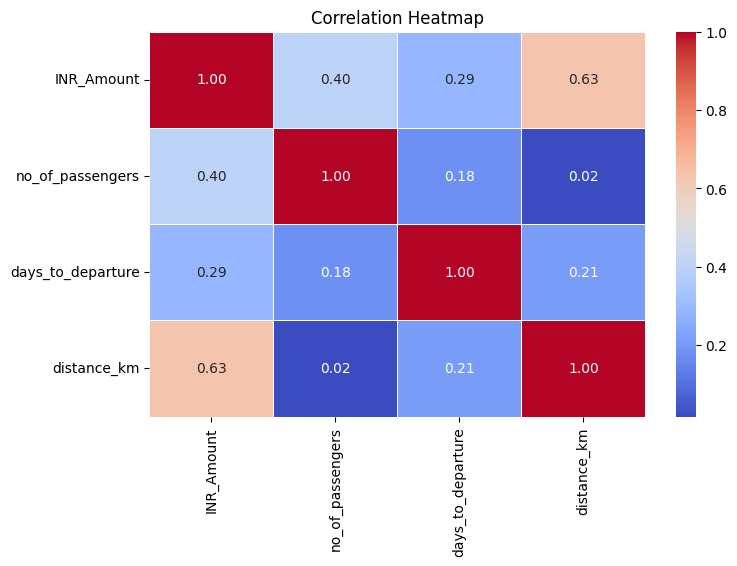

In [192]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [194]:
correlation_matrix_unstacked = correlation_matrix.unstack()
correlation_matrix_unstacked

INR_Amount         INR_Amount           1.000000
                   no_of_passengers     0.400701
                   days_to_departure    0.288065
                   distance_km          0.632153
no_of_passengers   INR_Amount           0.400701
                   no_of_passengers     1.000000
                   days_to_departure    0.177278
                   distance_km          0.017780
days_to_departure  INR_Amount           0.288065
                   no_of_passengers     0.177278
                   days_to_departure    1.000000
                   distance_km          0.208328
distance_km        INR_Amount           0.632153
                   no_of_passengers     0.017780
                   days_to_departure    0.208328
                   distance_km          1.000000
dtype: float64

In [195]:
# Drop self-correlations
correlation_matrix_unstacked = correlation_matrix_unstacked[correlation_matrix_unstacked < 1]
correlation_matrix_unstacked

INR_Amount         no_of_passengers     0.400701
                   days_to_departure    0.288065
                   distance_km          0.632153
no_of_passengers   INR_Amount           0.400701
                   days_to_departure    0.177278
                   distance_km          0.017780
days_to_departure  INR_Amount           0.288065
                   no_of_passengers     0.177278
                   distance_km          0.208328
distance_km        INR_Amount           0.632153
                   no_of_passengers     0.017780
                   days_to_departure    0.208328
dtype: float64

In [196]:
# Find the maximum correlation
max_corr_pair = correlation_matrix_unstacked.idxmax()
max_corr_pair


('INR_Amount', 'distance_km')

In [197]:
max_corr_value = correlation_matrix_unstacked.max()
max_corr_value

0.6321525367494226

In [198]:
print(f"Pair with maximum correlation: {max_corr_pair} with a correlation of {max_corr_value:.2f}")

Pair with maximum correlation: ('INR_Amount', 'distance_km') with a correlation of 0.63


#### 8. For each service, which is the most used device type for making bookings on the platform?

In [200]:
df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,session_251,search_978,2020-03-21T06:38:49.374Z,2020-03-21T06:39:51.268Z,Saturday
362,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,session_78,search_375,2020-01-31T20:27:38.420Z,2020-01-31T19:48:13.166Z,Friday
363,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11 14:31:28,Desktop,55152.80,YATRA,2.0,22.0,6760.0,session_118,search_30,2018-10-11T14:05:20.610Z,2018-10-11T12:38:29.186Z,Thursday
364,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11 18:46:59,Desktop,41117.60,GOIBIBO,1.0,20.0,6354.9,session_51,search_890,2022-07-11T18:42:18Z,2022-07-11T18:24:53.318Z,Monday


In [218]:
df['service_name'].nunique()

3

In [208]:
df['device_type_used'].value_counts()


device_type_used
Desktop      157
IOS          100
Android       75
MobileWeb     31
Tablet         3
Name: count, dtype: int64

In [210]:
df['device_type_used'].value_counts().index

Index(['Desktop', 'IOS', 'Android', 'MobileWeb', 'Tablet'], dtype='object', name='device_type_used')

In [212]:
most_used_device_by_service = df.groupby('service_name')['device_type_used'].agg(lambda x: x.value_counts())

print(most_used_device_by_service)

service_name
GOIBIBO       [73, 65, 49, 14]
MMT              [34, 8, 6, 5]
YATRA      [58, 22, 18, 11, 3]
Name: device_type_used, dtype: object


In [214]:
most_used_device_by_service = df.groupby('service_name')['device_type_used'].agg(lambda x: x.value_counts().index[0])

print(most_used_device_by_service)

service_name
GOIBIBO        IOS
MMT        Desktop
YATRA      Desktop
Name: device_type_used, dtype: object


#### 9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type

In [219]:
df['quarter'] = df['booking_time'].dt.to_period('Q')

In [ ]:
'''
Quarterly Periods:

Q1: January to March
Q2: April to June
Q3: July to September
Q4: October to December

'''

In [220]:
df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week,quarter
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,Wednesday,2020Q1
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,Wednesday,2018Q4
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,Monday,2019Q4
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,Friday,2021Q4
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,Tuesday,2020Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,session_251,search_978,2020-03-21T06:38:49.374Z,2020-03-21T06:39:51.268Z,Saturday,2020Q1
362,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,session_78,search_375,2020-01-31T20:27:38.420Z,2020-01-31T19:48:13.166Z,Friday,2020Q1
363,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11 14:31:28,Desktop,55152.80,YATRA,2.0,22.0,6760.0,session_118,search_30,2018-10-11T14:05:20.610Z,2018-10-11T12:38:29.186Z,Thursday,2018Q4
364,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11 18:46:59,Desktop,41117.60,GOIBIBO,1.0,20.0,6354.9,session_51,search_890,2022-07-11T18:42:18Z,2022-07-11T18:24:53.318Z,Monday,2022Q3


In [237]:
quarterly_bookings = df.groupby(['quarter', 'device_type_used']).size()

In [238]:
quarterly_bookings

quarter  device_type_used
2018Q3   Android              3
         Desktop              6
         MobileWeb            2
         Tablet               1
2018Q4   Android              3
         Desktop             27
         IOS                  4
         MobileWeb            4
         Tablet               1
2019Q1   Desktop              2
2019Q2   Desktop              1
         Tablet               1
2019Q3   Android              3
         Desktop              7
         IOS                  4
2019Q4   Android             15
         Desktop             14
         IOS                 15
2020Q1   Android             19
         Desktop             32
         IOS                 25
         MobileWeb           12
2020Q2   Android              2
2020Q3   Android              4
         IOS                  4
2020Q4   Android              6
         Desktop             15
         IOS                  2
         MobileWeb            1
2021Q1   Desktop             12
         IOS  

In [264]:
quarterly_bookings = df.groupby(['quarter', 'device_type_used']).size().unstack(fill_value=0)

In [265]:
quarterly_bookings

device_type_used,Android,Desktop,IOS,MobileWeb,Tablet
quarter,,,,,
2018Q3,3,6,0,2,1
2018Q4,3,27,4,4,1
2019Q1,0,2,0,0,0
2019Q2,0,1,0,0,1
2019Q3,3,7,4,0,0
2019Q4,15,14,15,0,0
2020Q1,19,32,25,12,0
2020Q2,2,0,0,0,0
2020Q3,4,0,4,0,0


#### 10.Consider the following example: 12 customers performed a total of 100 searches but 
only a few of them performed 10 bookings in total.
searches=100 bookings=10 customers=12
The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above 
information/context, answer the following:
• What is the average oBSR for each month of the year?
• What is the average oBSR for each day of the week?
• Plot a time series of oBSR on all the given dates.


In [239]:
df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week,quarter
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,Wednesday,2020Q1
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,Wednesday,2018Q4
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,Monday,2019Q4
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,Friday,2021Q4
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,Tuesday,2020Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,session_251,search_978,2020-03-21T06:38:49.374Z,2020-03-21T06:39:51.268Z,Saturday,2020Q1
362,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,session_78,search_375,2020-01-31T20:27:38.420Z,2020-01-31T19:48:13.166Z,Friday,2020Q1
363,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11 14:31:28,Desktop,55152.80,YATRA,2.0,22.0,6760.0,session_118,search_30,2018-10-11T14:05:20.610Z,2018-10-11T12:38:29.186Z,Thursday,2018Q4
364,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11 18:46:59,Desktop,41117.60,GOIBIBO,1.0,20.0,6354.9,session_51,search_890,2022-07-11T18:42:18Z,2022-07-11T18:24:53.318Z,Monday,2022Q3


In [241]:
total_searches = df['search_id'].nunique()
total_bookings = df['booking_id'].nunique()

In [243]:
print('total_searches: ',total_searches)
print('total_bookings :',total_bookings)


total_searches:  338
total_bookings : 338


In [246]:
oBSR = total_bookings / total_searches
print(oBSR)
df['oBSR'] = oBSR

1.0


In [245]:
df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week,quarter,oBSR
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,Wednesday,2020Q1,1.0
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,Wednesday,2018Q4,1.0
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,Monday,2019Q4,1.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,Friday,2021Q4,1.0
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,Tuesday,2020Q3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,session_251,search_978,2020-03-21T06:38:49.374Z,2020-03-21T06:39:51.268Z,Saturday,2020Q1,1.0
362,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,session_78,search_375,2020-01-31T20:27:38.420Z,2020-01-31T19:48:13.166Z,Friday,2020Q1,1.0
363,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11 14:31:28,Desktop,55152.80,YATRA,2.0,22.0,6760.0,session_118,search_30,2018-10-11T14:05:20.610Z,2018-10-11T12:38:29.186Z,Thursday,2018Q4,1.0
364,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11 18:46:59,Desktop,41117.60,GOIBIBO,1.0,20.0,6354.9,session_51,search_890,2022-07-11T18:42:18Z,2022-07-11T18:24:53.318Z,Monday,2022Q3,1.0


In [256]:
df['month'] = df['booking_time'].dt.to_period('M')
average_obsr_by_month = df.groupby('month')['oBSR'].count()

In [257]:
df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,...,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,day_of_week,quarter,oBSR,month
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08,Desktop,2565.28,MMT,...,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,Wednesday,2020Q1,1.0,2020-02
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47,Android,23120.00,YATRA,...,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,Wednesday,2018Q4,1.0,2018-11
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58,Android,25717.60,YATRA,...,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,Monday,2019Q4,1.0,2019-12
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38,Desktop,135969.60,GOIBIBO,...,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,Friday,2021Q4,1.0,2021-10
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10,Android,31791.20,GOIBIBO,...,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,Tuesday,2020Q3,1.0,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21 06:40:56,Android,6552.00,GOIBIBO,...,0.0,1274.7,session_251,search_978,2020-03-21T06:38:49.374Z,2020-03-21T06:39:51.268Z,Saturday,2020Q1,1.0,2020-03
362,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31 20:35:35,Desktop,126502.46,GOIBIBO,...,109.0,7190.9,session_78,search_375,2020-01-31T20:27:38.420Z,2020-01-31T19:48:13.166Z,Friday,2020Q1,1.0,2020-01
363,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11 14:31:28,Desktop,55152.80,YATRA,...,22.0,6760.0,session_118,search_30,2018-10-11T14:05:20.610Z,2018-10-11T12:38:29.186Z,Thursday,2018Q4,1.0,2018-10
364,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11 18:46:59,Desktop,41117.60,GOIBIBO,...,20.0,6354.9,session_51,search_890,2022-07-11T18:42:18Z,2022-07-11T18:24:53.318Z,Monday,2022Q3,1.0,2022-07


In [258]:
average_obsr_by_month

month
2018-09    12
2018-10    21
2018-11    10
2018-12     8
2019-01     2
2019-06     2
2019-07     5
2019-08     2
2019-09     7
2019-10     9
2019-11     8
2019-12    27
2020-01    33
2020-02    40
2020-03    15
2020-05     1
2020-06     1
2020-07     2
2020-08     3
2020-09     3
2020-10     8
2020-11    12
2020-12     4
2021-01     9
2021-02     4
2021-03     5
2021-04     8
2021-05     1
2021-06     6
2021-07     2
2021-08     4
2021-09    13
2021-10    16
2021-11    11
2021-12    11
2022-01    11
2022-02     8
2022-03     7
2022-04     3
2022-05     4
2022-06     4
2022-07     4
Freq: M, Name: oBSR, dtype: int64

In [266]:
average_obsr_by_day = df.groupby('day_of_week')['oBSR'].size   #mean()

In [267]:
average_obsr_by_day

day_of_week
Friday       57
Monday       54
Saturday     49
Sunday       38
Thursday     70
Tuesday      62
Wednesday    36
Name: oBSR, dtype: int64

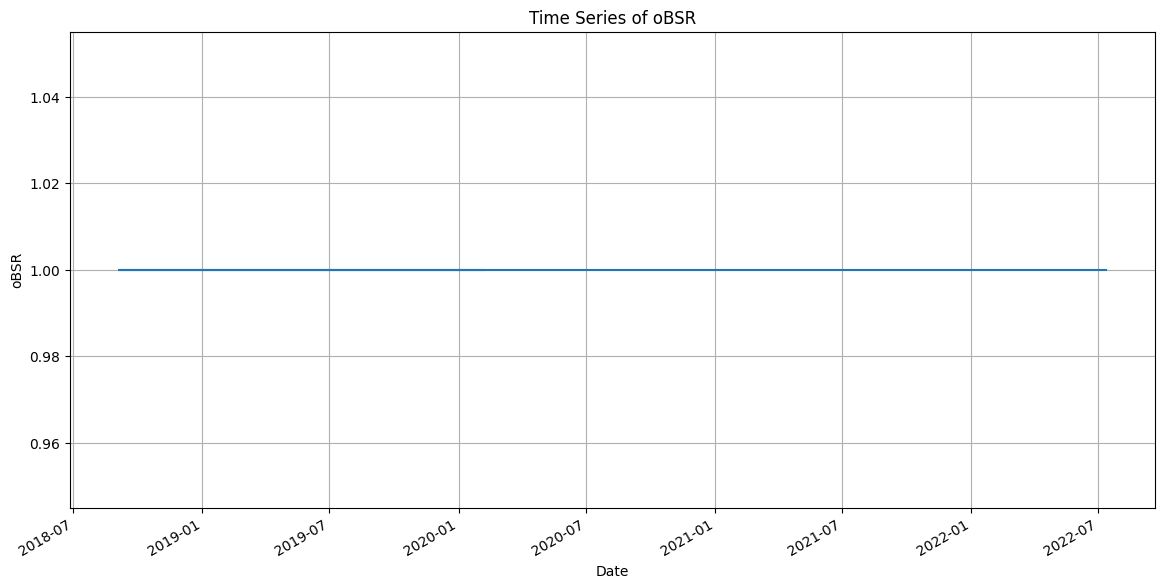

In [261]:
plt.figure(figsize=(14, 7))
df.set_index('booking_time')['oBSR'].plot()
plt.title('Time Series of oBSR')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.grid(True)
plt.show()

In [253]:
print("Average oBSR by Month:")
print(average_obsr_by_month)

print("\nAverage oBSR by Day of the Week:")
print(average_obsr_by_day)

Average oBSR by Month:
month
2018-09    1.0
2018-10    1.0
2018-11    1.0
2018-12    1.0
2019-01    1.0
2019-06    1.0
2019-07    1.0
2019-08    1.0
2019-09    1.0
2019-10    1.0
2019-11    1.0
2019-12    1.0
2020-01    1.0
2020-02    1.0
2020-03    1.0
2020-05    1.0
2020-06    1.0
2020-07    1.0
2020-08    1.0
2020-09    1.0
2020-10    1.0
2020-11    1.0
2020-12    1.0
2021-01    1.0
2021-02    1.0
2021-03    1.0
2021-04    1.0
2021-05    1.0
2021-06    1.0
2021-07    1.0
2021-08    1.0
2021-09    1.0
2021-10    1.0
2021-11    1.0
2021-12    1.0
2022-01    1.0
2022-02    1.0
2022-03    1.0
2022-04    1.0
2022-05    1.0
2022-06    1.0
2022-07    1.0
Freq: M, Name: oBSR, dtype: float64

Average oBSR by Day of the Week:
day_of_week
Friday       1.0
Monday       1.0
Saturday     1.0
Sunday       1.0
Thursday     1.0
Tuesday      1.0
Wednesday    1.0
Name: oBSR, dtype: float64
